importing library
1.numpy
2.pandas
3.seaborn
4. KMeans

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
c_dat = pd.read_csv('Customer_data.csv')

Testing

In [6]:
c_dat.head()

,S.No,Country,Age(Avg),Production,Sales
0,1,USA,37,97,32
1,2,India,53,46,46
2,3,UK,59,71,11
3,4,Vietnam,25,24,73
4,5,USA,41,99,39


data size to confirm full data has beein imported

In [14]:
c_dat.shape

(200, 5)

In [16]:
A = c_dat.iloc[:,[3,4]].values

In [17]:
print(A)

[[ 97  32]
 [ 46  46]
 [ 71  11]
 [ 24  73]
 [ 99  39]
 [ 54  53]
 [ 34  73]
 [ 60  52]
 [ 69  58]
 [ 81  93]
 [ 60  40]
 [ 28  61]
 [ 40  42]
 [ 54  48]
 [ 77  74]
 [ 61  49]
 [ 64  42]
 [ 63  54]
 [ 30   4]
 [ 58  46]
 [ 39  65]
 [ 78  20]
 [ 38  92]
 [ 54  51]
 [ 87  63]
 [ 48  47]
 [ 20  15]
 [ 42  52]
 [ 23  98]
 [ 48  51]
 [ 21  66]
 [ 49  42]
 [ 16  77]
 [ 19  72]
 [ 48  59]
 [ 86  20]
 [ 54  42]
 [ 33  14]
 [ 85  26]
 [ 62  59]
 [ 43  45]
 [ 87  10]
 [ 21  35]
 [ 98  15]
 [ 28  82]
 [ 20  13]
 [ 70  29]
 [ 75  93]
 [ 65  43]
 [ 77  36]
 [ 98  88]
 [137  18]
 [ 48  48]
 [ 77  12]
 [ 70  77]
 [ 97  86]
 [ 60  42]
 [103  69]
 [ 48  50]
 [ 17  76]
 [ 73  88]
 [ 50  49]
 [ 44  50]
 [ 42  60]
 [ 47  52]
 [ 62  56]
 [ 29  31]
 [ 23  29]
 [ 74  10]
 [ 63  52]
 [ 65  59]
 [ 43  60]
 [ 39  36]
 [ 63  46]
 [ 71  35]
 [ 87  27]
 [ 18  94]
 [ 78   1]
 [ 85  75]
 [ 46  51]
 [ 47  59]
 [ 63  43]
 [ 71  95]
 [ 33  81]
 [120  79]
 [ 72  34]
 [ 16   6]
 [ 34  17]
 [ 67  40]
 [ 57  55]
 [ 17  40]

Identifying the Number of Clusters

Using WCSS: Within Clusters Sum of Squares

In [10]:
WC=[]
#200 values so taking 15clusters at max
for i in range(1,16):
  KM = KMeans(n_clusters=i, init='k-means++', random_state=40)
  KM.fit(A)
  WC.append(KM.inertia_)

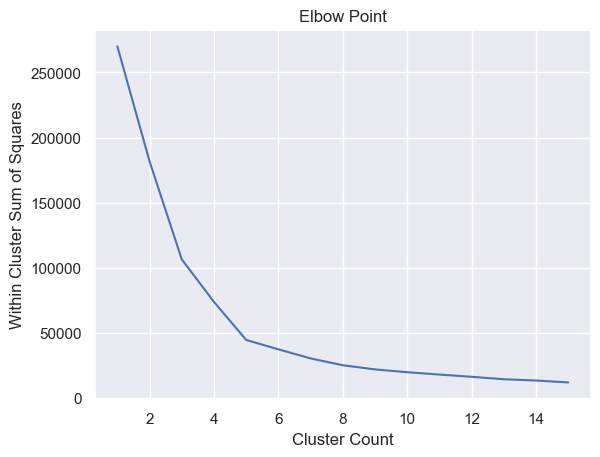

In [11]:
#Elbow Graph Plotting with seaborn Wcss formula
sns.set()
plt.plot(range(1,16),WC)
plt.title('Elbow Point')
plt.xlabel('Cluster Count')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

There are two elbow points in the above graph. According to the graph the drops are known as elbow points. The last drop after which there are no significant changes is at x=5. Hence We will be taking 5 clusters. We will Now train the clustering model

In [12]:
KM=KMeans(n_clusters=5, init='k-means++', random_state=0)
#Important to label each datapoint
Y=KM.fit_predict(A)
print(Y)

[2 0 2 1 2 0 1 0 0 4 0 1 0 0 4 0 0 0 3 0 1 2 1 0 4 0 3 0 1 0 1 0 1 1 0 2 0
 3 2 0 0 2 3 2 1 3 2 4 0 2 4 2 0 2 4 4 0 4 0 1 4 0 0 0 0 0 3 3 2 0 0 0 3 0
 0 2 1 2 4 0 0 0 4 1 4 0 3 3 0 0 3 4 4 0 4 4 2 4 4 1 0 0 3 4 4 0 4 0 4 2 2
 4 0 2 4 2 0 1 1 0 3 0 2 1 3 3 0 4 1 4 2 0 0 0 0 4 1 3 2 1 2 2 0 0 1 0 0 4
 0 2 0 0 3 4 2 4 2 0 3 1 2 0 2 0 0 0 4 0 4 0 4 4 0 0 2 2 0 2 0 0 3 4 0 0 4
 0 0 2 3 4 3 0 2 4 3 0 3 0 0 4]


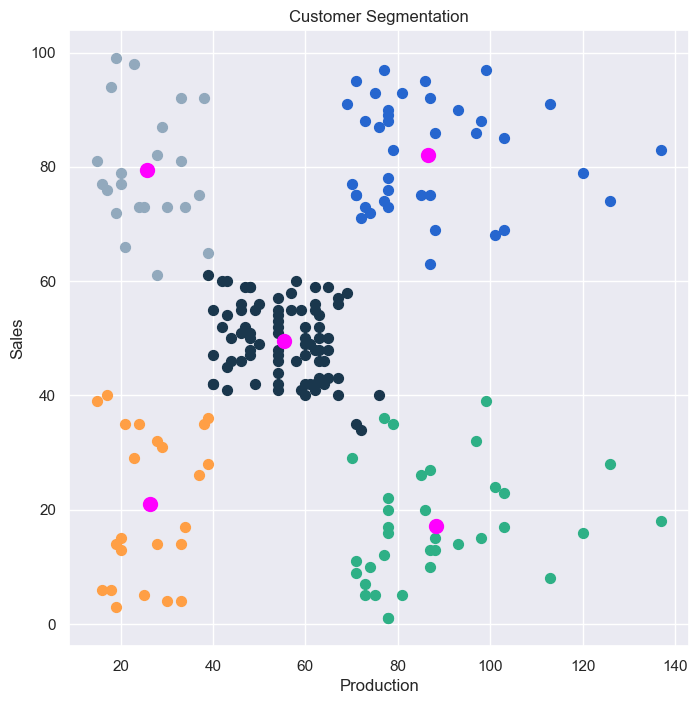

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(A[Y==0,0], A[Y==0,1], s=50, c='#1A374D', label='Cluster 1')
plt.scatter(A[Y==1,0], A[Y==1,1], s=50, c='#92A9BD', label='Cluster 2')
plt.scatter(A[Y==2,0], A[Y==2,1], s=50, c='#2EB086', label='Cluster 3')
plt.scatter(A[Y==3,0], A[Y==3,1], s=50, c='#FF9F45', label='Cluster 4')
plt.scatter(A[Y==4,0], A[Y==4,1], s=50, c='#2666CF', label='Cluster 5')

plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], s=100, c='magenta', label='Centroid')
plt.title('Customer Segmentation')
plt.xlabel('Production')
plt.ylabel('Sales')
plt.show()